In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calihouse/housing.csv


In [ ]:
pip install tensorflow==2.17.0 protobuf==3.20.3 google-api-core==2.16.0 tensorflow-metadata==1.13.1 tensorflow-text==2.17.0 google-cloud-translate==3.12.1 google-cloud-bigtable==2.27.0 pandas-gbq==0.25.0


In [ ]:
# load the dataset
df = pd.read_csv('/kaggle/input/calihouse/housing.csv')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)] # any missing data in columns

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/ 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

In [ ]:
# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
trdata,tedata = train_test_split(df2,test_size=0.3,random_state=43)

In [ ]:
import matplotlib.pyplot as plt

color1 = 'blue'  # or any valid matplotlib color
trdata.hist(bins=60, figsize=(15,9), color=color1)
plt.show()


In [ ]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def corrMat(df, id=None):
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat, dtype=bool)  # Use bool instead of np.bool
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", square=True, ax=ax)
    plt.show()

# Example usage (assuming trdata is defined):
# corrMat(trdata)



In [ ]:
corrMat(trdata)

In [ ]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

In [17]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 11440 to 14148
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   median_house_value  14448 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [19]:
import matplotlib.pyplot as plt

def plotTwo(gdf, columns):
    """
    Plots two columns from a GeoDataFrame side by side.
    
    Parameters:
    - gdf: GeoDataFrame containing the data.
    - columns: list of two column names to plot.
    """
    if len(columns) != 2:
        raise ValueError("Please provide exactly two column names.")
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    gdf.plot(column=columns[0], ax=axs[0], legend=True)
    axs[0].set_title(columns[0])
    gdf.plot(column=columns[1], ax=axs[1], legend=True)
    axs[1].set_title(columns[1])
    plt.tight_layout()
    plt.show()


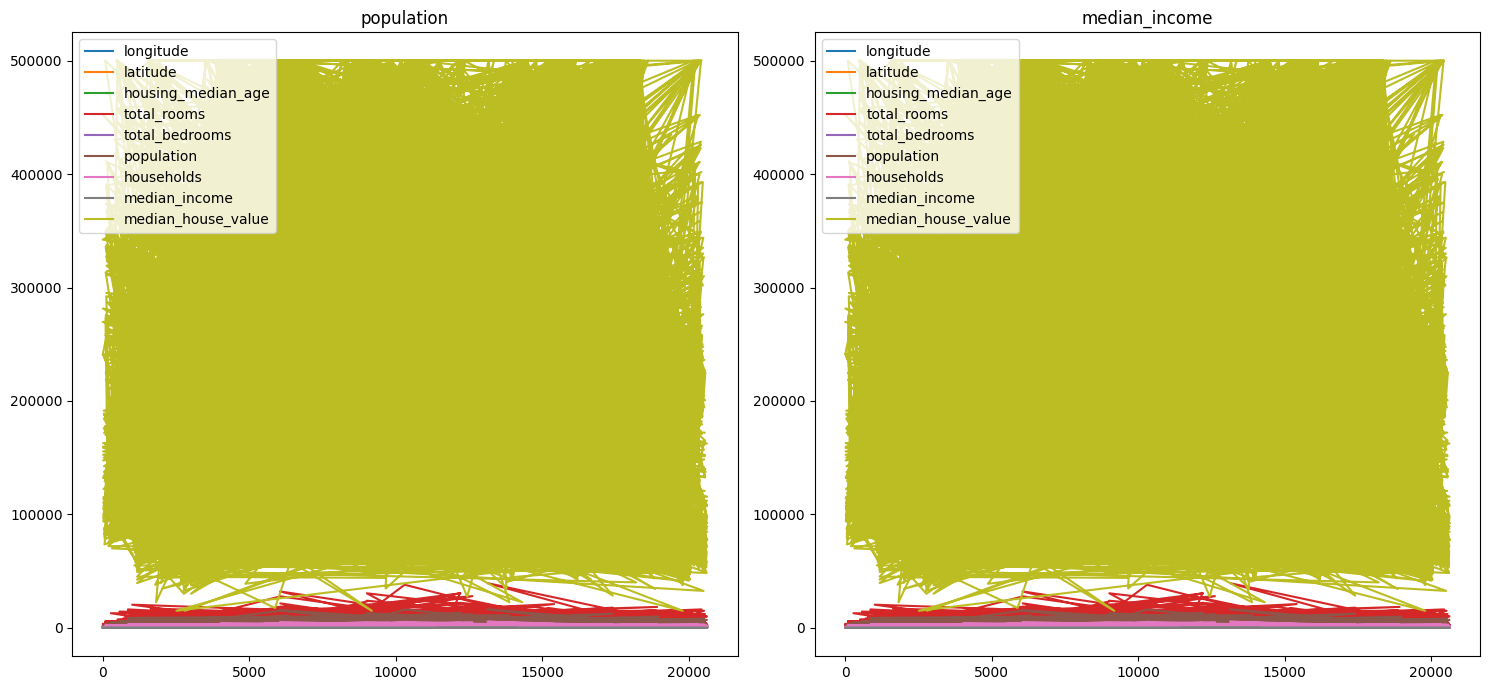

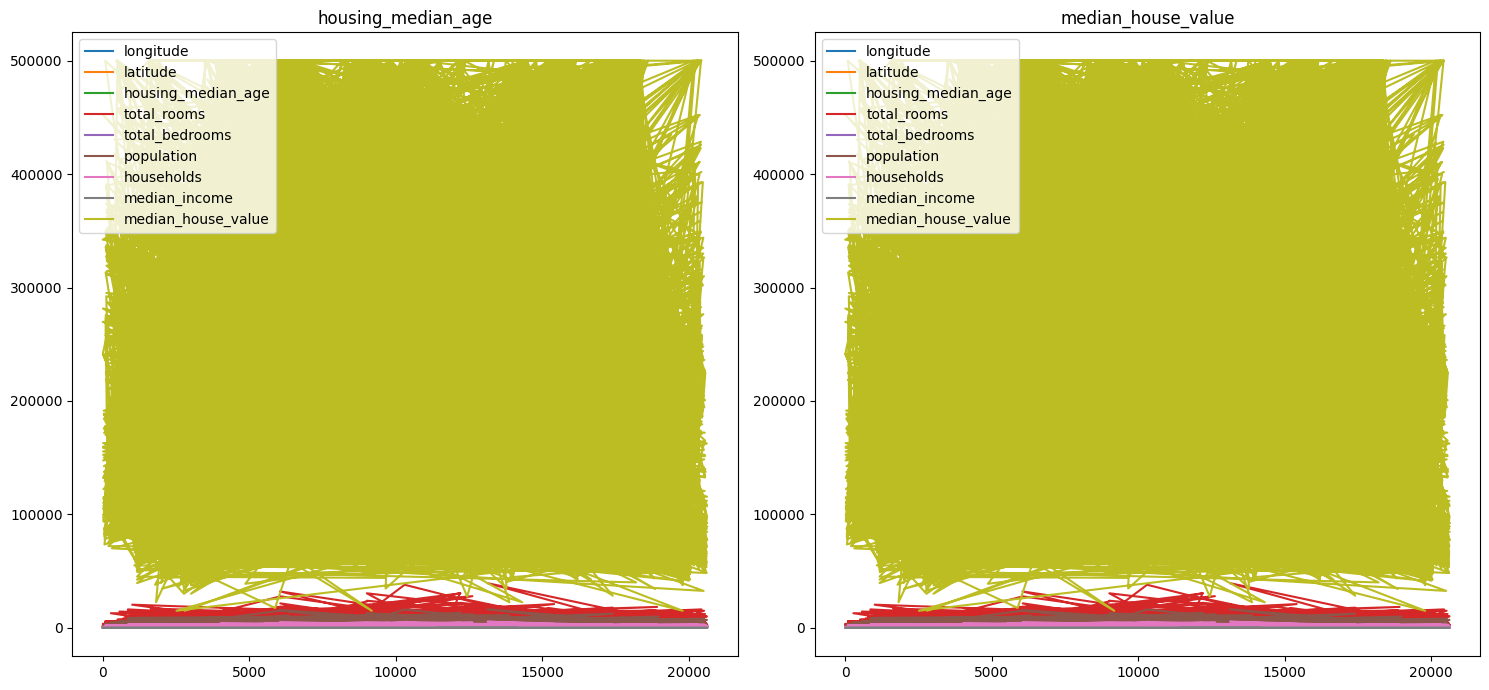

KeyError: 'geometry'

In [20]:
plotTwo(trdata, ['population', 'median_income'])
plotTwo(trdata, ['housing_median_age', 'median_house_value'])
del trdata['geometry']  # remove 'geometry' if it's not needed


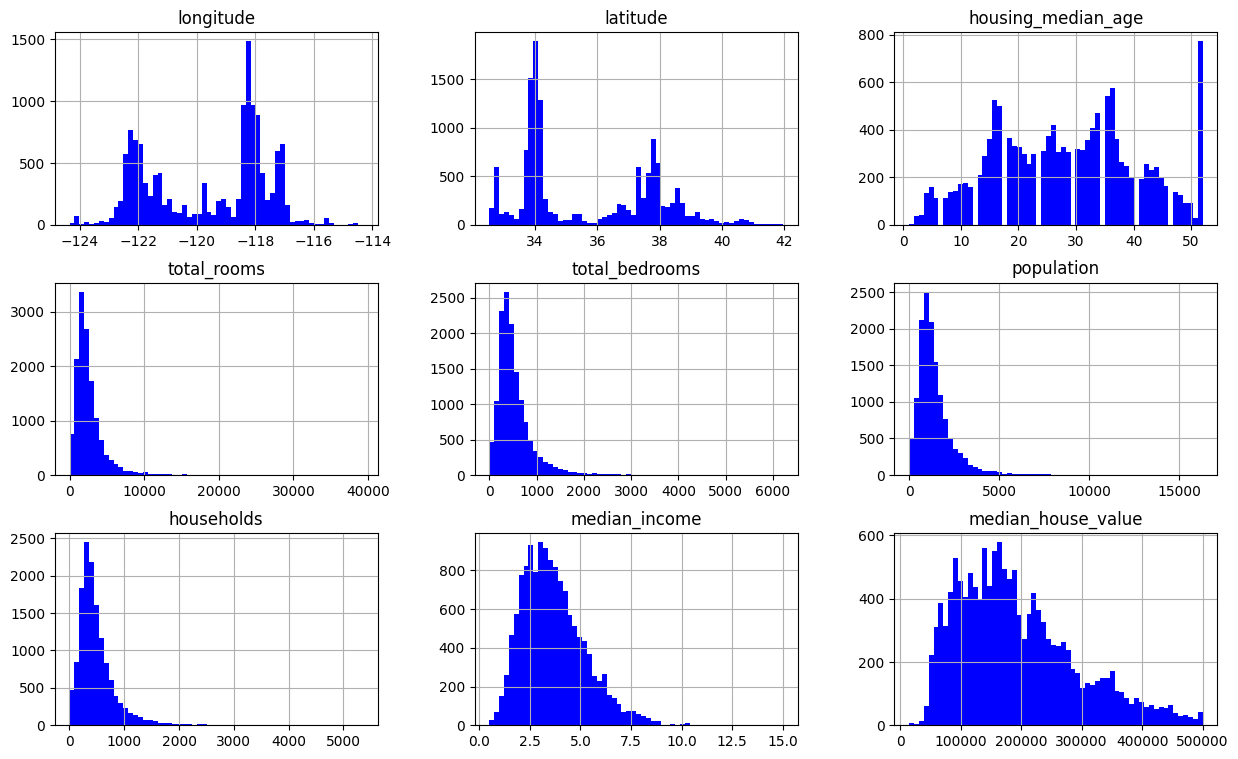

In [23]:
# trdata_upd : training data w/ removed outliers
maxval2 = trdata['median_house_value'].max() # get the maximum value
trdata_upd = trdata[trdata['median_house_value'] != maxval2] 
tedata_upd = tedata[tedata['median_house_value'] != maxval2]
trdata_upd.hist(bins=60, figsize=(15,9),color=color1);plt.show() # looks like its completely removed.

<ipython-input-24-af27adbf78b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_upd['diag_coord'] = (trdata_upd['longitude'] + trdata_upd['latitude'])         # 'diagonal coordinate', works for this coord
<ipython-input-24-af27adbf78b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_upd['bedperroom'] = trdata_upd['total_bedrooms']/trdata_upd['total_rooms']     # feature w/ bedrooms/room ratio
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value enc

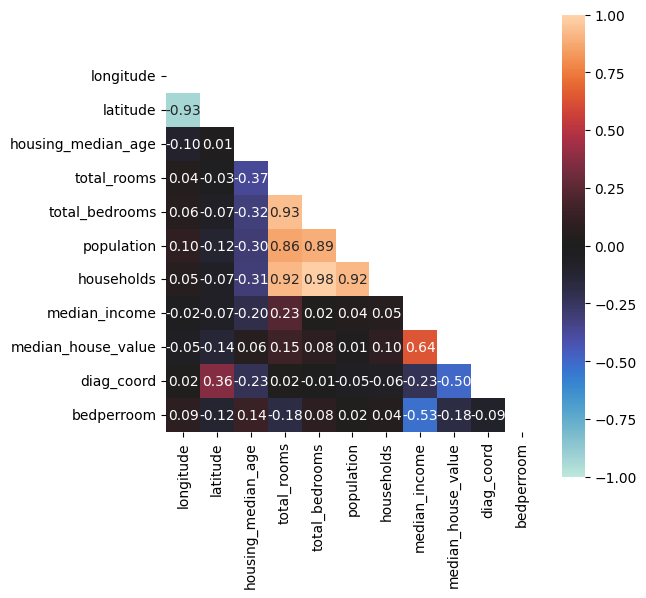

<ipython-input-24-af27adbf78b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tedata_upd['diag_coord'] = (tedata_upd['longitude'] + tedata_upd['latitude'])
<ipython-input-24-af27adbf78b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tedata_upd['bedperroom'] = tedata_upd['total_bedrooms']/tedata_upd['total_rooms']     # feature w/ bedrooms/room ratio


In [24]:
# Make a feature that contains both longtitude & latitude
trdata_upd['diag_coord'] = (trdata_upd['longitude'] + trdata_upd['latitude'])         # 'diagonal coordinate', works for this coord
trdata_upd['bedperroom'] = trdata_upd['total_bedrooms']/trdata_upd['total_rooms']     # feature w/ bedrooms/room ratio
corrMat(trdata_upd)
# update test data as well
tedata_upd['diag_coord'] = (tedata_upd['longitude'] + tedata_upd['latitude'])
tedata_upd['bedperroom'] = tedata_upd['total_bedrooms']/tedata_upd['total_rooms']     # feature w/ bedrooms/room ratio

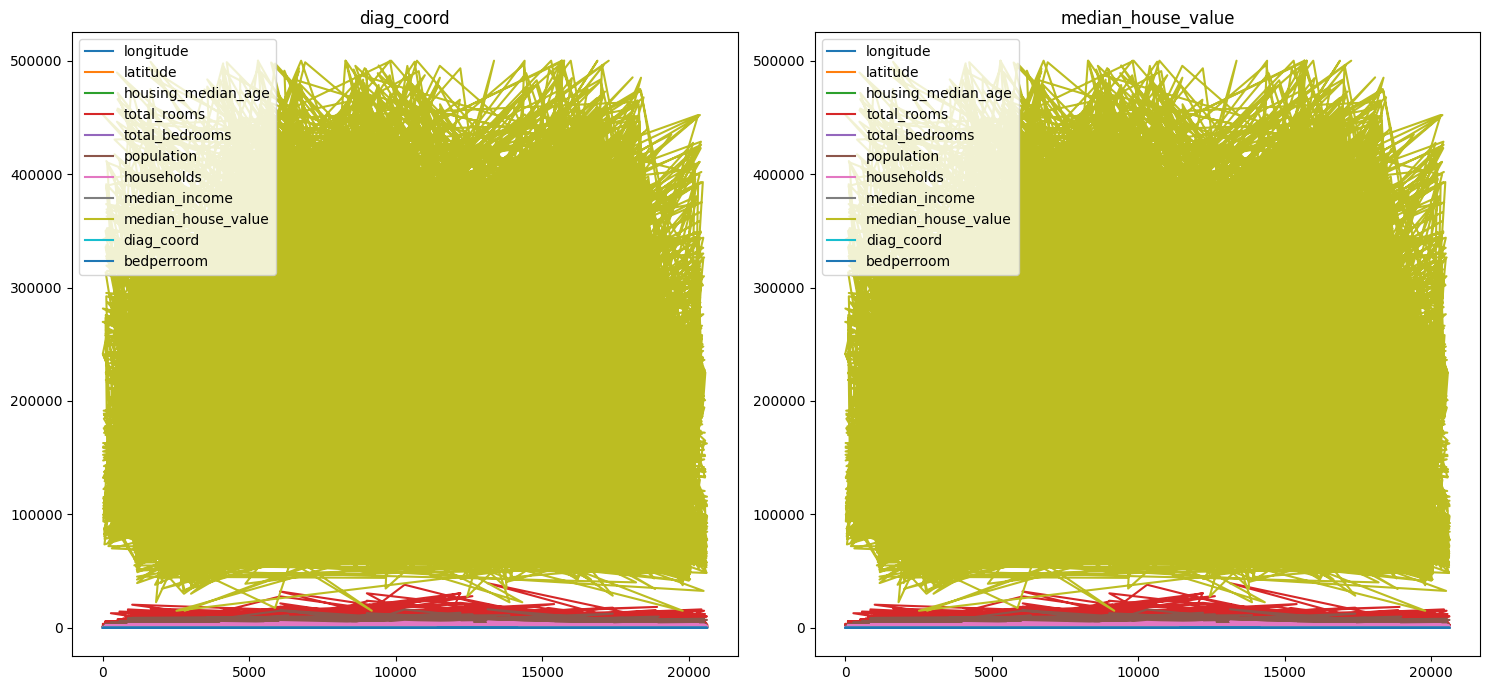

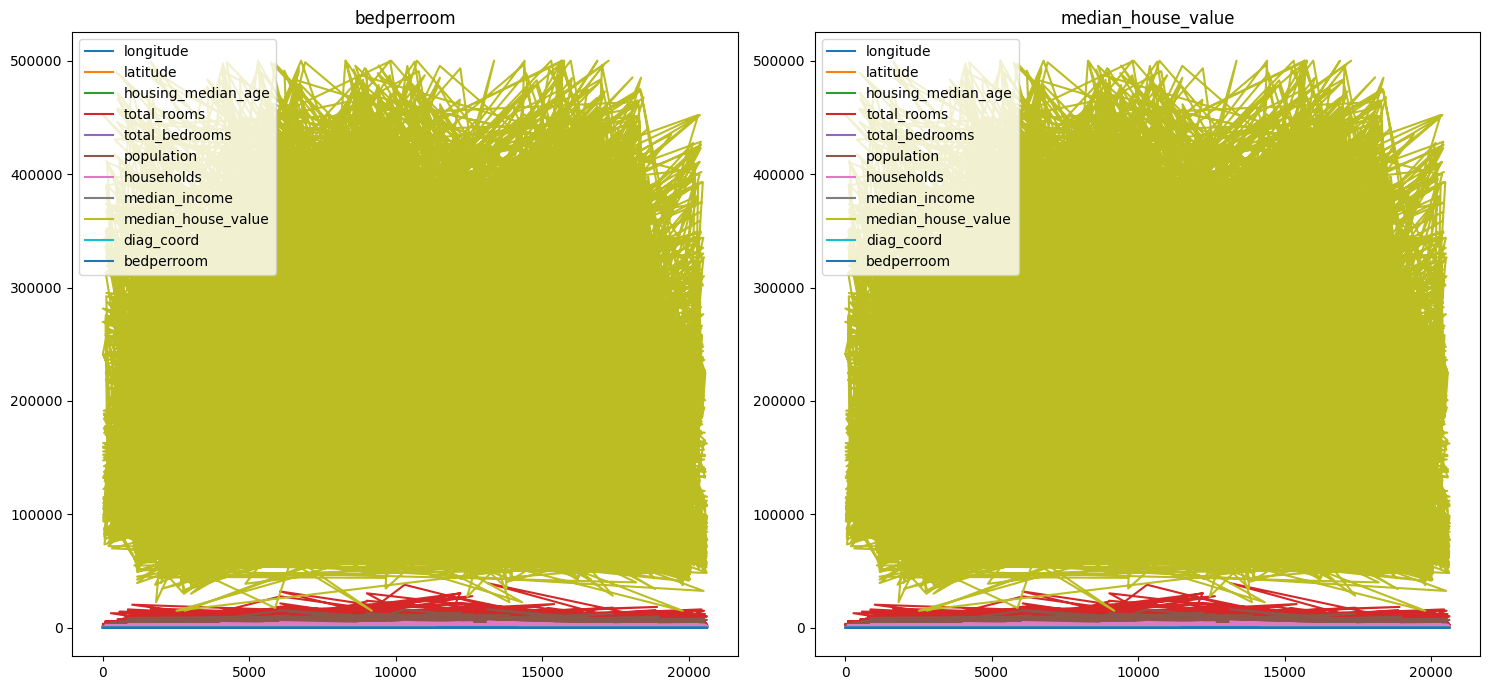

KeyError: 'geometry'

In [25]:
# lets plot them as well
plotTwo(trdata_upd,['diag_coord','median_house_value'])
plotTwo(trdata_upd,['bedperroom','median_house_value'])
del trdata_upd['geometry']  # remove gpd geometry features

In [51]:
# Model Evaluation w/ Cross Validation
def modelEval(ldf,feature='median_house_value',model_id = 'dummy'):
    
    # Input: Feature & Target DataFrame

    # Split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    # Pick Model 
    if(model_id =='dummy'):    model = DummyRegressor()
    if(model_id == 'br'):    model = BR(verbose=False)  
    if(model_id == 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)
    
    ''' Parameter Based Cross Validation (No Pipeline)'''
#     gscv = GridSearchCV(model,param_grid,cv=5)
#     gscv.fit(X,y)
#     results = pd.DataFrame(gscv.cv_results_)
#     scores = np.array(results.mean_test_score).reshape(7,7)
    
#     # plot the cross validation mean scores
#     heatmap1(scores,xlabel='lamda',xticklabels=param_grid['lamd'],
#                     ylabel='alpha',yticklabels=param_grid['alph'])
    
    ''' Standard Cross Validation '''
    cv_score = np.sqrt(-cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error'))
    print("Scores:",cv_score);print("Mean:", cv_score.mean());print("std:", cv_score.std())

In [53]:
# A simple comparison model
modelEval(trdata,model_id='dummy')

Scores: [116663.5674685  114151.26915538 115145.51668974 113869.10743556
 117199.8990859 ]
Mean: 115405.87196701465
std: 1326.9355363585662


In [58]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge as BR  # Import Bayesian Ridge Regression as BR

def get_model(model_id):
    """
    Returns a model instance based on the provided model_id.
    """
    if model_id == 'dummy':
        return DummyRegressor()
    elif model_id == 'br':
        return BR(verbose=False)
    elif model_id == 'rf':
        return RandomForestRegressor(n_estimators=10, random_state=10)
    else:
        raise ValueError("Unknown model_id: {}".format(model_id))

def modelEval(ldf, feature='target', model_id='dummy'):
    """
    Evaluate a model using cross-validation on the provided DataFrame.
    
    Parameters:
      ldf : DataFrame containing features and target.
      feature : The target variable column name.
      model_id : A string identifier for the model ('dummy', 'br', or 'rf').
    """
    # Split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]  # remove target variable
    
    # Get the model using the get_model function
    model = get_model(model_id)
    
    # Standard Cross Validation
    cv_score = np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))
    print("Scores:", cv_score)
    print("Mean:", cv_score.mean())
    print("Std:", cv_score.std())

# Example usage:
# Assuming trdata is your DataFrame and 'target' is the name of the target column.
# modelEval(trdata, feature='target', model_id='br')


In [63]:
modelEval(trdata, feature='median_house_value', model_id='br')


Scores: [70482.32239729 69385.4722974  70441.64296962 68843.82727868
 70367.96724522]
Mean: 69904.24643764299
Std: 668.0747318026101


In [65]:
# Assuming your target variable is 'median_house_value'
modelEval(trdata_upd, feature='median_house_value', model_id='br')


Scores: [61686.00406856 61918.75856315 62778.27265628 61540.88940056
 61426.48957602]
Mean: 61870.08285291508
Std: 482.95059104066104


In [68]:
# Assuming your target variable is 'median_house_value'
modelEval(trdata_upd, feature='median_house_value', model_id='br')


Scores: [61838.69696196 61983.12622171 62781.75403847 61565.7235912
 61473.21043627]
Mean: 61928.50224992198
Std: 464.3245359656674


In [72]:
print(trdata_upd.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'households', 'median_income', 'median_house_value', 'diag_coord',
       'bedperroom'],
      dtype='object')


In [73]:
modelEval(trdata_upd, feature='median_house_value', model_id='br')


Scores: [61838.69696196 61983.12622171 62781.75403847 61565.7235912
 61473.21043627]
Mean: 61928.50224992198
Std: 464.3245359656674


In [76]:
''' Plot Two Seaborn Heatmaps Side by Side '''
# used for Polynomial vs non polynomial cross validaion score comparison
def heatmap2(values,values2,xlabel,ylabel,xticklabels,yticklabels,
			cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

	fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
	sns.heatmap(values, ax=ax1,cmap=cmap)
	sns.heatmap(values2, ax=ax2,cmap=cmap)
	
	img = ax1.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
	img.update_scalarmappable()
	ax1.set_xlabel(xlabel);ax1.set_ylabel(ylabel)
	ax1.set_xticks(np.arange(len(xticklabels)) + 0.5)
	ax1.set_yticks(np.arange(len(yticklabels)) + 0.5)
	ax1.set_xticklabels(xticklabels);ax1.set_yticklabels(yticklabels)
	ax1.set_title('PolynomialFeatures(2) + BR()')
	ax1.set_aspect(1)
	
	for p, color, value in zip(img.get_paths(), img.get_facecolors(),
            img.get_array()):
		x, y = p.vertices[:-2, :].mean(0)
		if np.mean(color[:3]) > 0.5:
			c = 'k'
		else:
			c = 'w'
		ax2.text(x, y, fmt % value, color=c, ha="center", va="center")

In [78]:
# Model Evaluation Function w/ Pipelines
def modelEval2(ldf,feature='median_house_value',model_id = 'dummy',scaling_id=False):

    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    tlst = []
    for i in [2,3]:
        
        # Pick Model 
        if(model_id == 'dummy'):    model = DummyRegressor()
        if(model_id == 'br'):    model = BR(verbose=False)  
        if(model_id == 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)
            # Pick a Pipeline (Polynomial Feature Adjustment + Model)
        if(scaling_id is False):
            pipe = Pipeline(steps=[('poly',PolynomialFeatures(i)),
                                   ('model',model)])
        else:
            pipe = Pipeline(steps=[('scaler',StandardScaler()),
                                   ('poly',PolynomialFeatures(i)),
                                   ('model',model)])

        ''' Parameter Based Cross Validation (With Pipeline)'''
        # define a parameter search grid, pipepines require slightly different notations w/ __
#         param_grid = {
#         'model__lamd': [0.0001,0.001, 0.01, 0.1, 1, 10, 100],
#         'model__alph': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}
        
#         gscv2 = GridSearchCV(pipe, param_grid,cv=5)
#         gscv2.fit(X,y)
#         ypred = gscv2.predict(X)
#         results2 = pd.DataFrame(gscv2.cv_results_)
#         scores2 = np.array(results2.mean_test_score).reshape(7,7)
#         tlst.append(scores2)
        
        ''' Standard Cross Validation '''
        cv_score = np.sqrt(-cross_val_score(pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
        print("Scores:",cv_score.round(2))
        print("Mean:", cv_score.mean().round(2));print("std:", cv_score.std().round(2))
    
#     plot mean of 5 cross validation segment score
#     heatmap2(tlst[0],tlst[1],xlabel='lamd', xticklabels=param_grid['model__lamd'],
#                              ylabel='alph', yticklabels=param_grid['model__alph'])

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def modelEval2(ldf, feature='target', model_id='dummy', scaling_id=False):
    # Assume you split the target and features here
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]
    
    # Pick model based on model_id; assume get_model is defined
    model = get_model(model_id)
    
    # Pick a Pipeline (Polynomial Feature Adjustment + Model)
    if scaling_id is False:
        pipe = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=2)),  # You can adjust degree as needed
            ('model', model)
        ])
    else:
        # Some other pipeline if scaling is true (add your steps here)
        pass

    # For example, perform cross validation
    from sklearn.model_selection import cross_val_score
    import numpy as np
    cv_score = np.sqrt(-cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error'))
    print("Scores:", cv_score)
    print("Mean:", cv_score.mean())
    print("Std:", cv_score.std())

# Example usage:
# modelEval2(trdata_upd, feature='median_house_value', model_id='br', scaling_id=False)


In [85]:
def modelEval2(ldf, feature='SalePrice', model_id='dummy', scaling_id=False):
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]
    # rest of your code...


In [90]:
modelEval2(trdata_upd, feature='median_house_value', model_id='br', scaling_id=True)


In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import BayesianRidge as BR

# Function to select the model based on model_id
def get_model(model_id):
    if model_id == 'rf':
        return RandomForestRegressor(n_estimators=10, random_state=10)
    elif model_id == 'br':
        return BR(verbose=False)
    elif model_id == 'dummy':
        return DummyRegressor()
    else:
        raise ValueError("Unknown model_id: " + model_id)

# Evaluation function that splits target and features then performs cross-validation
def modelEval(ldf, feature='median_house_value', model_id='dummy'):
    """
    Evaluate a model using cross-validation on the given DataFrame.
    
    Parameters:
      ldf : DataFrame containing features and target.
      feature : The target variable column name (default 'median_house_value').
      model_id : A string identifier for the model ('dummy', 'br', or 'rf').
    """
    # Check that the target column exists
    if feature not in ldf.columns:
        raise KeyError(f"Target column '{feature}' not found. Available columns: {ldf.columns.tolist()}")
    
    # Split the target variable and features
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]
    
    # Get the model based on the provided model_id
    model = get_model(model_id)
    
    # Perform cross-validation evaluation
    cv_score = np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))
    print("CV Scores:", cv_score)
    print("Mean CV Score:", cv_score.mean())
    print("Std CV Score:", cv_score.std())

# Print available columns to verify the target column name
print("Available columns:", list(trdata_upd.columns))

# Call the evaluation function with the correct target column name.
modelEval(trdata_upd, feature='median_house_value', model_id='rf')


Available columns: ['longitude', 'latitude', 'housing_median_age', 'population', 'households', 'median_income', 'median_house_value', 'diag_coord', 'bedperroom']
CV Scores: [47877.45096346 48536.53995306 49218.09331114 46963.11182888
 48178.80873039]
Mean CV Score: 48154.800957386906
Std CV Score: 744.8406086738519
